In [9]:
# Dependencies
import pandas as pd
import ipywidgets as widgets
import numpy as np
from scipy import special
import sys
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [10]:
# Create DataFrame from .csv and review - Census Data
income_df = pd.read_csv("../Data/Census_Data.csv", low_memory=False, header=[0,1])
income_df

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_001M,S1901_C01_002E,S1901_C01_002M,S1901_C01_003E,S1901_C01_003M,S1901_C01_004E,S1901_C01_004M,...,S1901_C04_012E,S1901_C04_012M,S1901_C04_013E,S1901_C04_013M,S1901_C04_014E,S1901_C04_014M,S1901_C04_015E,S1901_C04_015M,S1901_C04_016E,S1901_C04_016M
,id,Geographic Area Name,Estimate!!Households!!Total,Margin of Error!!Households!!Total,"Estimate!!Households!!Total!!Less than $10,000","Margin of Error!!Households!!Total!!Less than $10,000","Estimate!!Households!!Total!!$10,000 to $14,999","Margin of Error!!Households!!Total!!$10,000 to $14,999","Estimate!!Households!!Total!!$15,000 to $24,999","Margin of Error!!Households!!Total!!$15,000 to $24,999",...,Estimate!!Nonfamily households!!Median income (dollars),Margin of Error!!Nonfamily households!!Median income (dollars),Estimate!!Nonfamily households!!Mean income (dollars),Margin of Error!!Nonfamily households!!Mean income (dollars),Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Household income in the past 12 months,Margin of Error!!Nonfamily households!!PERCENT ALLOCATED!!Household income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Margin of Error!!Nonfamily households!!PERCENT ALLOCATED!!Family income in the past 12 months,Estimate!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months,Margin of Error!!Nonfamily households!!PERCENT ALLOCATED!!Nonfamily income in the past 12 months
0,8600000US00601,ZCTA5 00601,5509,189,37.2,3.8,14.7,2.8,17.9,3,...,9419,2104,12857,2026,(X),(X),(X),(X),20.4,(X)
1,8600000US00602,ZCTA5 00602,12740,443,30,2.9,15.3,2.4,19,2.3,...,9963,1449,14634,2640,(X),(X),(X),(X),13.4,(X)
2,8600000US00603,ZCTA5 00603,19228,503,34.8,2,13.1,1.6,16.3,1.9,...,10520,1005,18759,2769,(X),(X),(X),(X),30.4,(X)
3,8600000US00606,ZCTA5 00606,1946,176,41.4,5.7,13,4.1,18,5.1,...,10272,2285,11572,2117,(X),(X),(X),(X),17,(X)
4,8600000US00610,ZCTA5 00610,8795,388,24.9,3.2,14.9,2.4,20.3,2.9,...,12352,1512,15183,1921,(X),(X),(X),(X),16.7,(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,8600000US99923,ZCTA5 99923,14,20,0,62.2,0,62.2,0,62.2,...,-,**,N,N,(X),(X),(X),(X),0,(X)
33116,8600000US99925,ZCTA5 99925,317,41,4.7,2.3,2.2,1.9,20.8,5.8,...,22303,4340,53585,19820,(X),(X),(X),(X),13.7,(X)
33117,8600000US99926,ZCTA5 99926,487,41,5.3,2.7,3.7,2.7,12.7,5.7,...,30446,7452,35873,7725,(X),(X),(X),(X),27,(X)


In [11]:
# Limit DataFrame to needed columns
me_income_df = income_df[["NAME", "S1901_C01_012E", "S1901_C01_013E"]].copy()
me_income_df.head(10)

,NAME,S1901_C01_012E,S1901_C01_013E
,Geographic Area Name,Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars)
0,ZCTA5 00601,14361,20370
1,ZCTA5 00602,16807,25808
2,ZCTA5 00603,16049,27033
3,ZCTA5 00606,12119,16823
4,ZCTA5 00610,19898,27929
5,ZCTA5 00612,18741,26135
6,ZCTA5 00616,17007,25399
7,ZCTA5 00617,16984,24226
8,ZCTA5 00622,14615,27660


In [12]:
# Rename columns
me_income_df = me_income_df.rename(columns={'NAME': 'Name', 'S1901_C01_012E': 'Median_Inc_Dollars', 'S1901_C01_013E': 'Mean_Inc_Dollars'})
me_income_df.head()

,Name,Median_Inc_Dollars,Mean_Inc_Dollars
,Geographic Area Name,Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars)
0,ZCTA5 00601,14361,20370
1,ZCTA5 00602,16807,25808
2,ZCTA5 00603,16049,27033
3,ZCTA5 00606,12119,16823
4,ZCTA5 00610,19898,27929


In [13]:
# Delete unneeded header row
me_income_df.columns = me_income_df.columns.droplevel(-1)
me_income_df.head()

,Name,Median_Inc_Dollars,Mean_Inc_Dollars
0,ZCTA5 00601,14361,20370
1,ZCTA5 00602,16807,25808
2,ZCTA5 00603,16049,27033
3,ZCTA5 00606,12119,16823
4,ZCTA5 00610,19898,27929


In [14]:
# Slice NAME column to isolate 5 digit Zip Code in ZIPCODE column
me_income_df['Zip_Code'] = me_income_df['Name'].str.slice(6, 12)
me_income_df

,Name,Median_Inc_Dollars,Mean_Inc_Dollars,Zip_Code
0,ZCTA5 00601,14361,20370,00601
1,ZCTA5 00602,16807,25808,00602
2,ZCTA5 00603,16049,27033,00603
3,ZCTA5 00606,12119,16823,00606
4,ZCTA5 00610,19898,27929,00610
...,...,...,...,...
33115,ZCTA5 99923,-,N,99923
33116,ZCTA5 99925,62917,75567,99925
33117,ZCTA5 99926,56188,68581,99926
33118,ZCTA5 99927,-,-,99927


In [15]:
# Check data types
me_income_df.dtypes

Name                  object
Median_Inc_Dollars    object
Mean_Inc_Dollars      object
Zip_Code              object
dtype: object

In [16]:
# Sort to review values
me_income_df = me_income_df.sort_values('Median_Inc_Dollars')
me_income_df

,Name,Median_Inc_Dollars,Mean_Inc_Dollars,Zip_Code
14934,ZCTA5 45884,-,361455,45884
7722,ZCTA5 24962,-,N,24962
7721,ZCTA5 24957,-,96751,24957
2537,ZCTA5 08858,-,N,08858
7701,ZCTA5 24898,-,N,24898
...,...,...,...,...
5918,ZCTA5 19003,99923,130782,19003
4691,ZCTA5 15668,99931,133524,15668
298,ZCTA5 01516,99943,117784,01516
2939,ZCTA5 11563,99947,126323,11563


In [17]:
# Eliminate rows with non-numeric value (This is an unknown value - could not find explanation on census.gov)
me_income_df = me_income_df[me_income_df.Median_Inc_Dollars != "2,500-"]
me_income_df

,Name,Median_Inc_Dollars,Mean_Inc_Dollars,Zip_Code
14934,ZCTA5 45884,-,361455,45884
7722,ZCTA5 24962,-,N,24962
7721,ZCTA5 24957,-,96751,24957
2537,ZCTA5 08858,-,N,08858
7701,ZCTA5 24898,-,N,24898
...,...,...,...,...
5918,ZCTA5 19003,99923,130782,19003
4691,ZCTA5 15668,99931,133524,15668
298,ZCTA5 01516,99943,117784,01516
2939,ZCTA5 11563,99947,126323,11563


In [18]:
# Eliminate rows with non-numeric value
me_income_df = me_income_df[me_income_df.Median_Inc_Dollars != "250,000+"]
me_income_df

,Name,Median_Inc_Dollars,Mean_Inc_Dollars,Zip_Code
14934,ZCTA5 45884,-,361455,45884
7722,ZCTA5 24962,-,N,24962
7721,ZCTA5 24957,-,96751,24957
2537,ZCTA5 08858,-,N,08858
7701,ZCTA5 24898,-,N,24898
...,...,...,...,...
5918,ZCTA5 19003,99923,130782,19003
4691,ZCTA5 15668,99931,133524,15668
298,ZCTA5 01516,99943,117784,01516
2939,ZCTA5 11563,99947,126323,11563


In [19]:
# Check data types
me_income_df.dtypes

Name                  object
Median_Inc_Dollars    object
Mean_Inc_Dollars      object
Zip_Code              object
dtype: object

In [20]:
# Create DataFrame from .csv and review - Sales Data
sales_df = pd.read_csv("../Data/web_us_breakdown.csv")
sales_df.head()

,product_sku,date,shipping_city,billing_postal_code,api_client_title,product_grouping,product_title,category,net_sales,shipping,taxes,total_sales
0,1999,2020-01-01,47983,47983,Online Store,NaN,Shipping,NaN,0.0,1.640,0.115,1.755
1,1999,2020-01-01,Aberdeen,57401,Online Store,NaN,Shipping,NaN,0.0,5.465,0.355,5.820
2,1999,2020-01-01,Aberdeen Proving Ground,21005,Online Store,NaN,Shipping,NaN,0.0,7.820,0.000,7.820
3,1999,2020-01-01,Abilene,79562,Online Store,NaN,Shipping,NaN,0.0,3.640,0.000,3.640
4,1999,2020-01-01,Abilene,79603,Online Store,NaN,Shipping,NaN,0.0,3.640,0.000,3.640


In [21]:
# Limit DataFrame to needed columns
sales_df = sales_df[["date", "billing_postal_code", "api_client_title", "product_title", "net_sales"]].copy()
sales_df.head(10)

,date,billing_postal_code,api_client_title,product_title,net_sales
0,2020-01-01,47983,Online Store,Shipping,0.0
1,2020-01-01,57401,Online Store,Shipping,0.0
2,2020-01-01,21005,Online Store,Shipping,0.0
3,2020-01-01,79562,Online Store,Shipping,0.0
4,2020-01-01,79603,Online Store,Shipping,0.0
5,2020-01-01,79604,Online Store,Shipping,0.0
6,2020-01-01,79605,Online Store,Shipping,0.0
7,2020-01-01,79605,Recurring Billing by Recharge,Shipping,0.0
8,2020-01-01,24211-6360,Online Store,Shipping,0.0
9,2020-01-01,19001,Online Store,Shipping,0.0


In [22]:
# Drop Shipping product_title values
sales_df.drop(sales_df.index[sales_df['product_title'] == 'Shipping'], inplace=True)
sales_df.head()

,date,billing_postal_code,api_client_title,product_title,net_sales
6829,2020-01-01,21005,Online Store,Glucosamine Chondroitin 60 capsules,11.245
6830,2020-01-01,79604,Online Store,Glucosamine Chondroitin 60 capsules,12.495
6831,2020-01-01,19001,Online Store,Glucosamine Chondroitin 60 capsules,10.625
6832,2020-01-01,30103,Online Store,Glucosamine Chondroitin 60 capsules,10.620
6833,2020-01-01,96701,Online Store,Glucosamine Chondroitin 60 capsules,12.495


In [23]:
# Round 'net_sales' column to 2 decimal places
sales_df['net_sales'] = sales_df['net_sales'].round(2)
sales_df.head()

,date,billing_postal_code,api_client_title,product_title,net_sales
6829,2020-01-01,21005,Online Store,Glucosamine Chondroitin 60 capsules,11.24
6830,2020-01-01,79604,Online Store,Glucosamine Chondroitin 60 capsules,12.50
6831,2020-01-01,19001,Online Store,Glucosamine Chondroitin 60 capsules,10.62
6832,2020-01-01,30103,Online Store,Glucosamine Chondroitin 60 capsules,10.62
6833,2020-01-01,96701,Online Store,Glucosamine Chondroitin 60 capsules,12.50


In [24]:
# Drop 01-01-2022 "date" values
sales_df = sales_df[sales_df['date'] != '2022-01-01']
sales_df.sort_values('date', ascending=True)

,date,billing_postal_code,api_client_title,product_title,net_sales
6829,2020-01-01,21005,Online Store,Glucosamine Chondroitin 60 capsules,11.24
17215,2020-01-01,58554,Online Store,Fruits and Greens 30 capsules,9.75
17216,2020-01-01,70471,Online Store,Fruits and Greens 30 capsules,9.75
17217,2020-01-01,96923,Online Store,Fruits and Greens 30 capsules,0.00
17218,2020-01-01,66503,Online Store,Fruits and Greens 30 capsules,9.75
...,...,...,...,...,...
716541,2021-12-01,22314,Online Store,Hair/Skin/Nails Ultra 180 capsules,0.00
716540,2021-12-01,22308,Online Store,Hair/Skin/Nails Ultra 180 capsules,0.00
716539,2021-12-01,22304,Online Store,Hair/Skin/Nails Ultra 180 capsules,0.00
716551,2021-12-01,77511,Online Store,Hair/Skin/Nails Ultra 180 capsules,0.00


In [25]:
# Slice billing_postal_code column to isolate 5 digit Zip Code in ZIPCODE column
sales_df['Zip_Code'] = sales_df['billing_postal_code'].str.split('-').str[0]
sales_df.head(10)

,date,billing_postal_code,api_client_title,product_title,net_sales,Zip_Code
6829,2020-01-01,21005,Online Store,Glucosamine Chondroitin 60 capsules,11.24,21005
6830,2020-01-01,79604,Online Store,Glucosamine Chondroitin 60 capsules,12.50,79604
6831,2020-01-01,19001,Online Store,Glucosamine Chondroitin 60 capsules,10.62,19001
6832,2020-01-01,30103,Online Store,Glucosamine Chondroitin 60 capsules,10.62,30103
6833,2020-01-01,96701,Online Store,Glucosamine Chondroitin 60 capsules,12.50,96701
6834,2020-01-01,87105,Online Store,Glucosamine Chondroitin 60 capsules,10.62,87105
6835,2020-01-01,87116,Online Store,Glucosamine Chondroitin 60 capsules,12.50,87116
6836,2020-01-01,49401,Online Store,Glucosamine Chondroitin 60 capsules,11.24,49401
6837,2020-01-01,91001,Online Store,Glucosamine Chondroitin 60 capsules,21.24,91001
6838,2020-01-01,73521,Online Store,Glucosamine Chondroitin 60 capsules,10.62,73521


In [26]:
## Add leading zeros to the character column in Python
sales_df['Zip_Code']=sales_df['Zip_Code'].str.rjust(5, "0")
sales_df

,date,billing_postal_code,api_client_title,product_title,net_sales,Zip_Code
6829,2020-01-01,21005,Online Store,Glucosamine Chondroitin 60 capsules,11.24,21005
6830,2020-01-01,79604,Online Store,Glucosamine Chondroitin 60 capsules,12.50,79604
6831,2020-01-01,19001,Online Store,Glucosamine Chondroitin 60 capsules,10.62,19001
6832,2020-01-01,30103,Online Store,Glucosamine Chondroitin 60 capsules,10.62,30103
6833,2020-01-01,96701,Online Store,Glucosamine Chondroitin 60 capsules,12.50,96701
...,...,...,...,...,...,...
736500,2021-12-01,28411,Online Store,Allereze Nasal Spray 4oz,12.50,28411
736501,2021-12-01,34787,Online Store,Allereze Nasal Spray 4oz,12.50,34787
736502,2021-12-01,32789,Online Store,Allereze Nasal Spray 4oz,24.99,32789
736503,2021-12-01,7095,Online Store,Allereze Nasal Spray 4oz,10.62,07095


In [27]:
# Check data types
sales_df.dtypes

date                    object
billing_postal_code     object
api_client_title        object
product_title           object
net_sales              float64
Zip_Code                object
dtype: object

In [28]:
# Combine the data into a single dataset
sales_income_df = pd.merge(me_income_df, sales_df, how="left", on=["Zip_Code", "Zip_Code"])
sales_income_df.head(-25)

,Name,Median_Inc_Dollars,Mean_Inc_Dollars,Zip_Code,date,billing_postal_code,api_client_title,product_title,net_sales
0,ZCTA5 45884,-,361455,45884,NaN,NaN,NaN,NaN,NaN
1,ZCTA5 24962,-,N,24962,NaN,NaN,NaN,NaN,NaN
2,ZCTA5 24957,-,96751,24957,NaN,NaN,NaN,NaN,NaN
3,ZCTA5 08858,-,N,08858,NaN,NaN,NaN,NaN,NaN
4,ZCTA5 24898,-,N,24898,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
538222,ZCTA5 11563,99947,126323,11563,2021-09-01,11563,Online Store,Turmeric Joint 180 capsules,22.50
538223,ZCTA5 11563,99947,126323,11563,2021-09-01,11563,Online Store,Fruits and Greens 60 capsules,22.50
538224,ZCTA5 11563,99947,126323,11563,2021-09-01,11563,Recurring Billing by Recharge,Fruits and Greens 60 capsules,20.24
538225,ZCTA5 11563,99947,126323,11563,2021-10-01,11563,Recurring Billing by Recharge,Bronchial Wellness Herbal Blend 60 capsules,20.24


In [29]:
# Eliminate rows with non-numeric value
sales_income_df = sales_income_df[sales_income_df.Median_Inc_Dollars != "-"]
sales_income_df

,Name,Median_Inc_Dollars,Mean_Inc_Dollars,Zip_Code,date,billing_postal_code,api_client_title,product_title,net_sales
2744,ZCTA5 12859,100000,98447,12859,2021-04-01,12859,Online Store,Hair/Skin/Nails Ultra 30 capsules,2.50
2745,ZCTA5 12859,100000,98447,12859,2021-04-01,12859,Online Store,Bronchial Wellness Herbal Blend 30 capsules,9.99
2746,ZCTA5 12859,100000,98447,12859,2021-12-01,12859,Online Store,Brain Boost,5.85
2747,ZCTA5 07422,100000,119990,07422,2020-02-01,7422,Online Store,Vitamin B12 60 capsules,9.75
2748,ZCTA5 07422,100000,119990,07422,2020-08-01,7422,Online Store,Fruits and Greens 30 capsules,8.50
...,...,...,...,...,...,...,...,...,...
538247,ZCTA5 93923,99955,164725,93923,2021-04-01,93923,Online Store,Thyroid Complex,17.00
538248,ZCTA5 93923,99955,164725,93923,2021-04-01,93923,Online Store,Turmeric Joint 30 capsules,9.99
538249,ZCTA5 93923,99955,164725,93923,2021-08-01,93923,Online Store,Thyroid Complex,25.49
538250,ZCTA5 93923,99955,164725,93923,2021-11-01,93923,Online Store,Fruits and Greens 30 capsules,8.99


In [30]:
# Eliminate rows with non-numeric value
sales_income_df = sales_income_df[sales_income_df.Median_Inc_Dollars != "N"]
sales_income_df

,Name,Median_Inc_Dollars,Mean_Inc_Dollars,Zip_Code,date,billing_postal_code,api_client_title,product_title,net_sales
2744,ZCTA5 12859,100000,98447,12859,2021-04-01,12859,Online Store,Hair/Skin/Nails Ultra 30 capsules,2.50
2745,ZCTA5 12859,100000,98447,12859,2021-04-01,12859,Online Store,Bronchial Wellness Herbal Blend 30 capsules,9.99
2746,ZCTA5 12859,100000,98447,12859,2021-12-01,12859,Online Store,Brain Boost,5.85
2747,ZCTA5 07422,100000,119990,07422,2020-02-01,7422,Online Store,Vitamin B12 60 capsules,9.75
2748,ZCTA5 07422,100000,119990,07422,2020-08-01,7422,Online Store,Fruits and Greens 30 capsules,8.50
...,...,...,...,...,...,...,...,...,...
538247,ZCTA5 93923,99955,164725,93923,2021-04-01,93923,Online Store,Thyroid Complex,17.00
538248,ZCTA5 93923,99955,164725,93923,2021-04-01,93923,Online Store,Turmeric Joint 30 capsules,9.99
538249,ZCTA5 93923,99955,164725,93923,2021-08-01,93923,Online Store,Thyroid Complex,25.49
538250,ZCTA5 93923,99955,164725,93923,2021-11-01,93923,Online Store,Fruits and Greens 30 capsules,8.99


In [31]:
# Group into new dataframe
sales_med_df = pd.DataFrame(sales_income_df.groupby(["Zip_Code", "Median_Inc_Dollars"]).sum()["net_sales"].astype(int))
sales_med_df = sales_med_df.reset_index()
sales_med_df

,Zip_Code,Median_Inc_Dollars,net_sales
0,00601,14361,0
1,00602,16807,74
2,00603,16049,330
3,00606,12119,0
4,00610,19898,9
...,...,...,...
30792,99921,52188,0
30793,99922,33750,0
30794,99925,62917,0
30795,99926,56188,0


In [32]:
# Check data types
sales_med_df.dtypes

Zip_Code              object
Median_Inc_Dollars    object
net_sales              int32
dtype: object

In [33]:
# Convert column to integer for calculation
sales_med_df['Median_Inc_Dollars'] = sales_med_df['Median_Inc_Dollars'].astype(int)
sales_med_df

,Zip_Code,Median_Inc_Dollars,net_sales
0,00601,14361,0
1,00602,16807,74
2,00603,16049,330
3,00606,12119,0
4,00610,19898,9
...,...,...,...
30792,99921,52188,0
30793,99922,33750,0
30794,99925,62917,0
30795,99926,56188,0


In [34]:
# Confirm data types
sales_med_df.dtypes

Zip_Code              object
Median_Inc_Dollars     int32
net_sales              int32
dtype: object

In [35]:
# Write column to list
median_inc = sales_med_df["Median_Inc_Dollars"].tolist()
median_inc

[14361,
 16807,
 16049,
 12119,
 19898,
 18741,
 17007,
 16984,
 14615,
 17130,
 16701,
 17000,
 10244,
 17405,
 16843,
 15792,
 30573,
 14223,
 19764,
 21987,
 12072,
 17355,
 17715,
 19030,
 16834,
 14595,
 14013,
 16922,
 14245,
 18299,
 14992,
 19943,
 17144,
 14217,
 14706,
 16332,
 15185,
 20941,
 17874,
 18288,
 20585,
 19576,
 14794,
 18846,
 17275,
 20214,
 20760,
 17615,
 12188,
 17969,
 12121,
 19372,
 18922,
 15295,
 16063,
 21350,
 31688,
 19340,
 21469,
 15723,
 15473,
 18395,
 21894,
 19859,
 20065,
 12944,
 22121,
 22960,
 18087,
 19403,
 19827,
 14880,
 19682,
 16295,
 19700,
 21175,
 16107,
 21850,
 22667,
 19830,
 35183,
 21663,
 13683,
 14995,
 17415,
 37552,
 20269,
 17073,
 20471,
 21469,
 106518,
 36495,
 19443,
 35470,
 22292,
 6493,
 12802,
 15220,
 25117,
 25809,
 18763,
 14159,
 18176,
 11090,
 35788,
 35268,
 27229,
 14991,
 29019,
 23127,
 26667,
 30466,
 29511,
 15497,
 15276,
 48163,
 49099,
 50419,
 22480,
 32377,
 34701,
 24895,
 25750,
 26156,
 32555,


In [36]:
# Write column to list
sales = sales_med_df["net_sales"].tolist()
sales

[0,
 74,
 330,
 0,
 9,
 200,
 0,
 94,
 0,
 188,
 0,
 9,
 0,
 39,
 0,
 29,
 481,
 0,
 87,
 93,
 5,
 0,
 40,
 0,
 150,
 0,
 0,
 76,
 0,
 109,
 95,
 158,
 46,
 151,
 103,
 135,
 40,
 0,
 0,
 0,
 53,
 114,
 0,
 0,
 0,
 94,
 0,
 0,
 0,
 12,
 0,
 0,
 110,
 5,
 9,
 98,
 154,
 0,
 152,
 40,
 0,
 27,
 9,
 67,
 161,
 0,
 0,
 54,
 0,
 147,
 32,
 25,
 0,
 0,
 52,
 57,
 0,
 59,
 0,
 161,
 141,
 125,
 25,
 32,
 25,
 0,
 193,
 0,
 188,
 124,
 0,
 608,
 104,
 175,
 35,
 43,
 0,
 223,
 424,
 123,
 149,
 0,
 76,
 0,
 1014,
 419,
 287,
 0,
 375,
 197,
 314,
 117,
 226,
 8,
 22,
 353,
 203,
 925,
 122,
 305,
 209,
 100,
 124,
 51,
 526,
 288,
 641,
 0,
 796,
 0,
 0,
 0,
 0,
 45,
 235,
 266,
 19,
 0,
 317,
 144,
 0,
 115,
 18,
 0,
 296,
 8,
 348,
 42,
 0,
 38,
 72,
 741,
 76,
 0,
 19,
 165,
 210,
 645,
 553,
 0,
 81,
 0,
 20,
 54,
 236,
 0,
 210,
 191,
 0,
 0,
 0,
 38,
 44,
 0,
 872,
 0,
 858,
 26,
 0,
 91,
 77,
 0,
 0,
 185,
 25,
 187,
 68,
 308,
 107,
 400,
 52,
 22,
 58,
 9,
 768,
 0,
 18,
 0,
 56,
 0,


In [37]:
# Run regression
(slope, intercept, r_value, p_value, std_err) = linregress(sales, median_inc)

In [38]:
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = 8.63x + 59077.86
The p-value is: 0.000


In [39]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(sale * slope + intercept) for sale in sales]

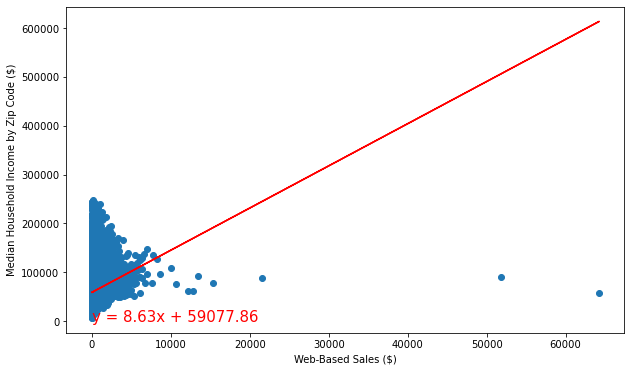

In [40]:
# Import Matplotlib.
import matplotlib.pyplot as plt

# Define plot space
fig, ax = plt.subplots(figsize=(10, 6))

# Create a scatter plot of the x and y values.
plt.scatter(sales, median_inc)

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(sales,regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Web-Based Sales ($)')
plt.ylabel('Median Household Income by Zip Code ($)')


plt.show()